# Hotel Booking

## Load and Analyze Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'hotel_booking.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(hotel_data.head())

# Display basic information about the dataset
print(hotel_data.info())

# Display descriptive Statistics
print(hotel_data.describe())

#Check for Missing Values
print(hotel_data.isnull().sum())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

# Handle Missing Values

In [14]:
hotel_data['children'] = hotel_data['children'].fillna(hotel_data['children'].median())
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode()[0])
hotel_data['agent'] = hotel_data['agent'].fillna(hotel_data['agent'].mode()[0])
hotel_data['company'] = hotel_data['company'].fillna(hotel_data['company'].mode()[0])

# verify missing values are handled
print(hotel_data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Universal Analysis

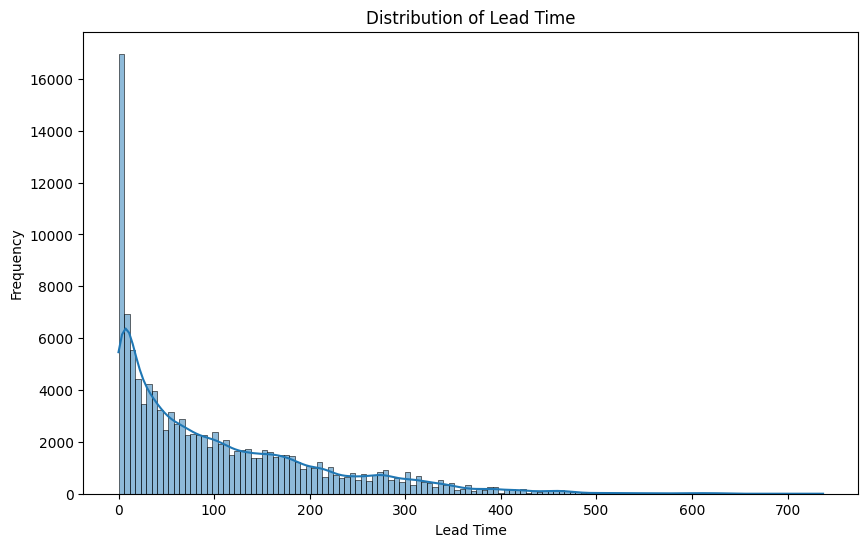

In [16]:
# Lead Time
import matplotlib.pyplot as plt
import seaborn as sns

# Lead Time Distribution
plt.figure(figsize=(10,6))
sns.histplot(hotel_data['lead_time'], kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

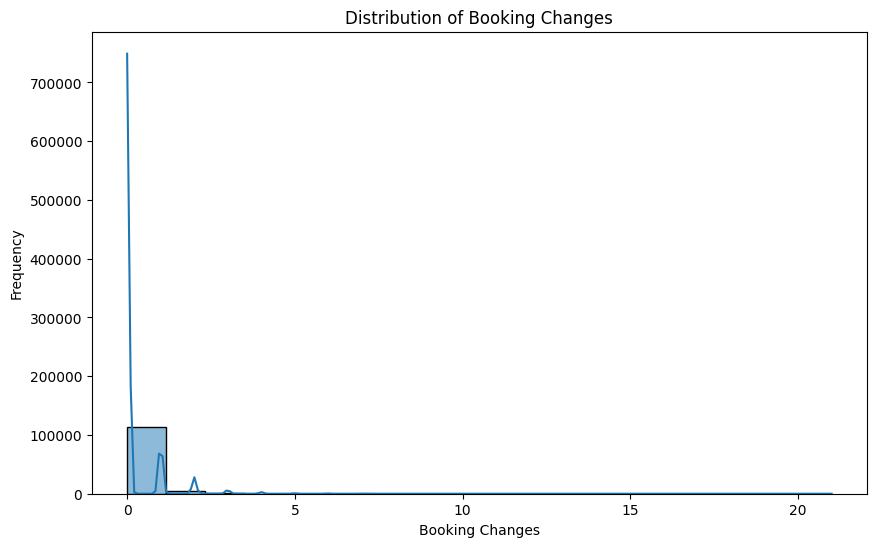

In [17]:
# Booking Changes Distribution
plt.figure(figsize=(10,6))
sns.histplot(hotel_data['booking_changes'], kde=True)
plt.title('Distribution of Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Frequency')
plt.show()

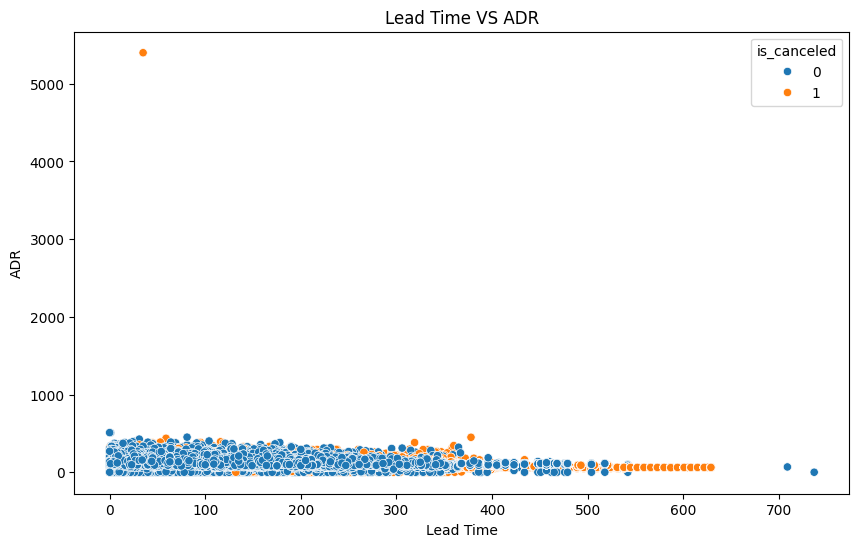

In [18]:
# Scatter Plot Lead Time Distribution
plt.figure(figsize=(10,6))
sns.scatterplot(data=hotel_data, x='lead_time', y='adr', hue='is_canceled')
plt.title('Lead Time VS ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()

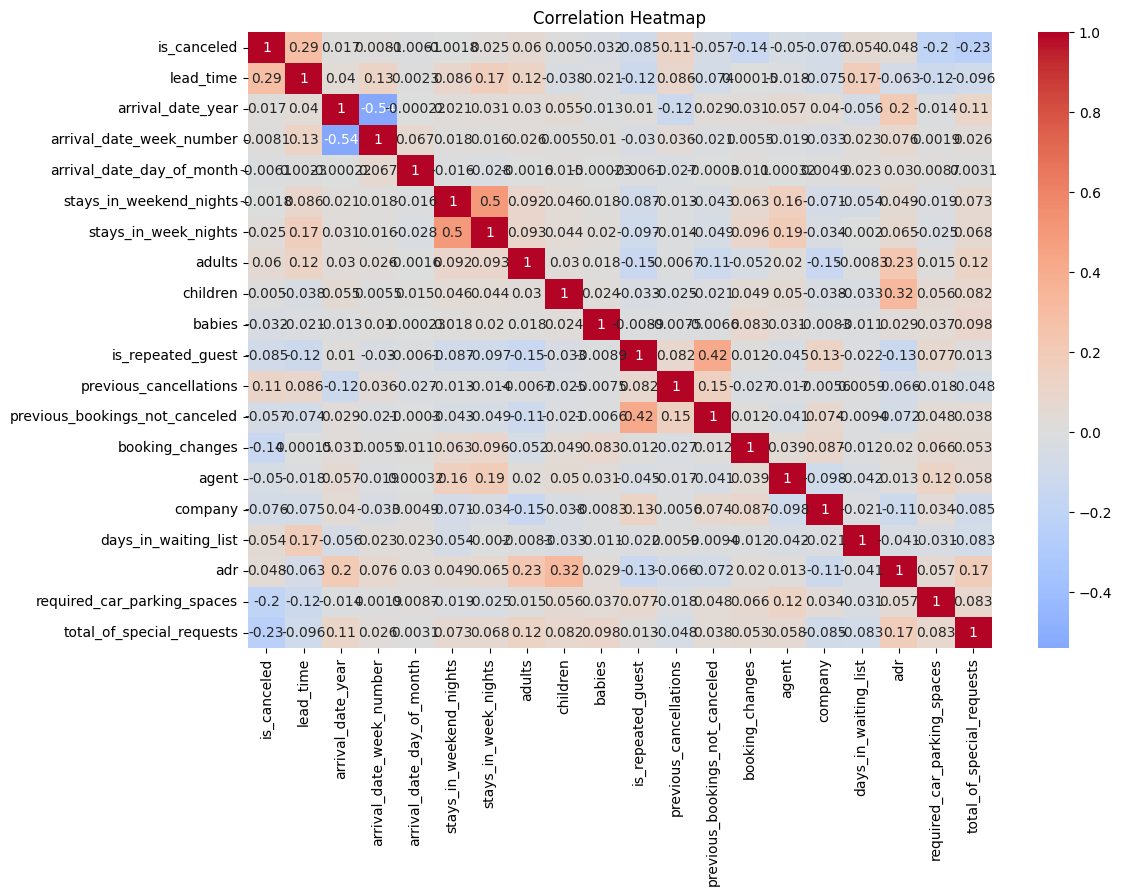

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = hotel_data.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Outlier Analysis

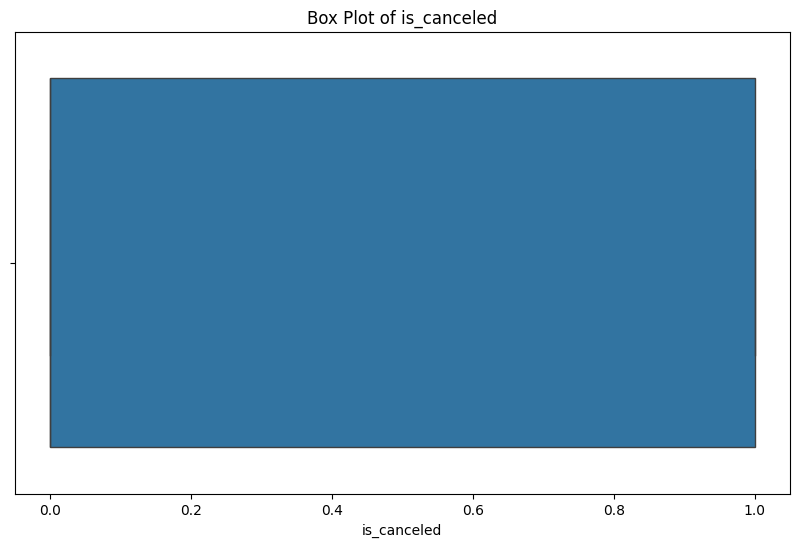

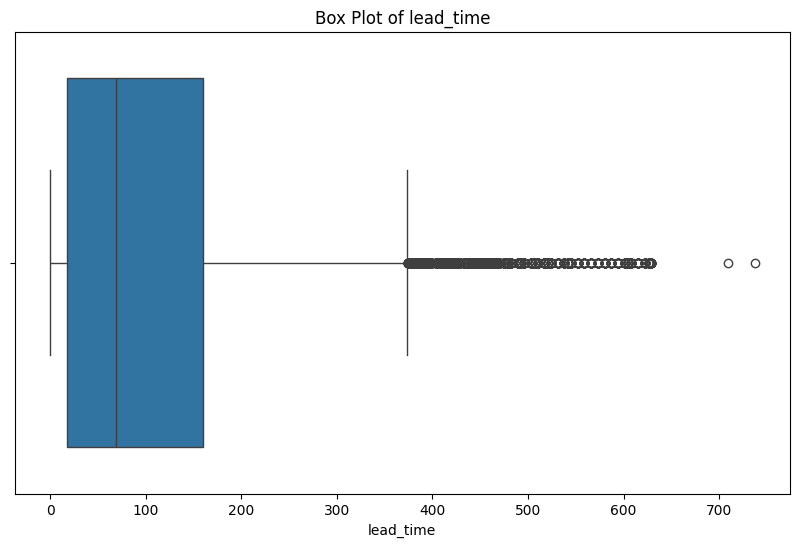

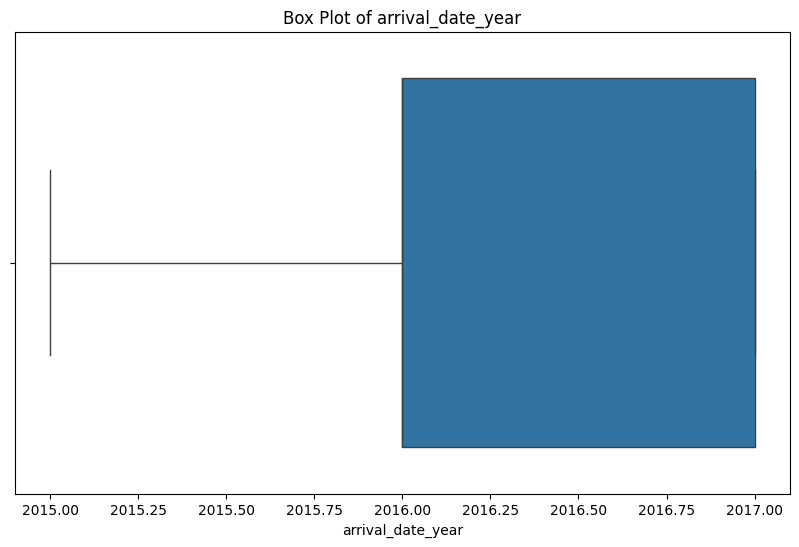

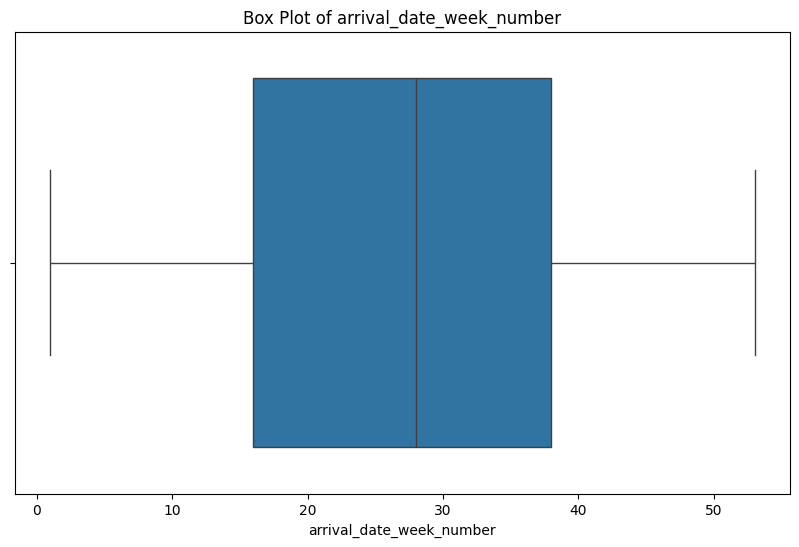

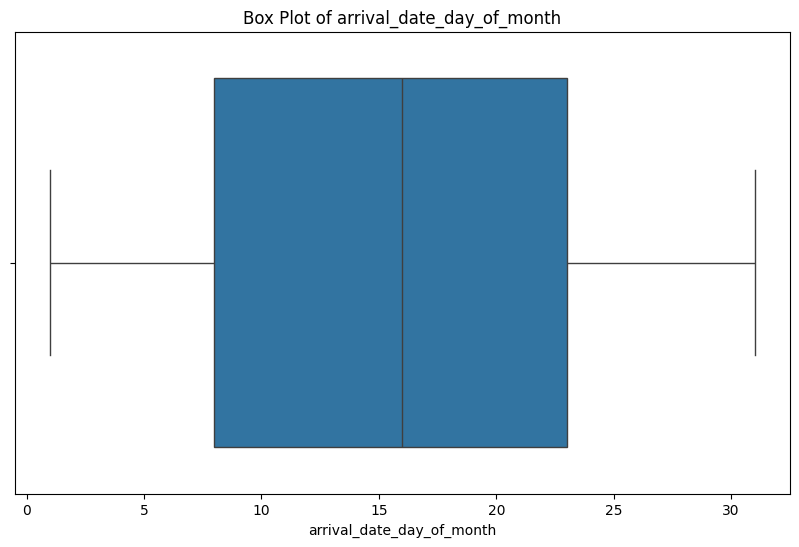

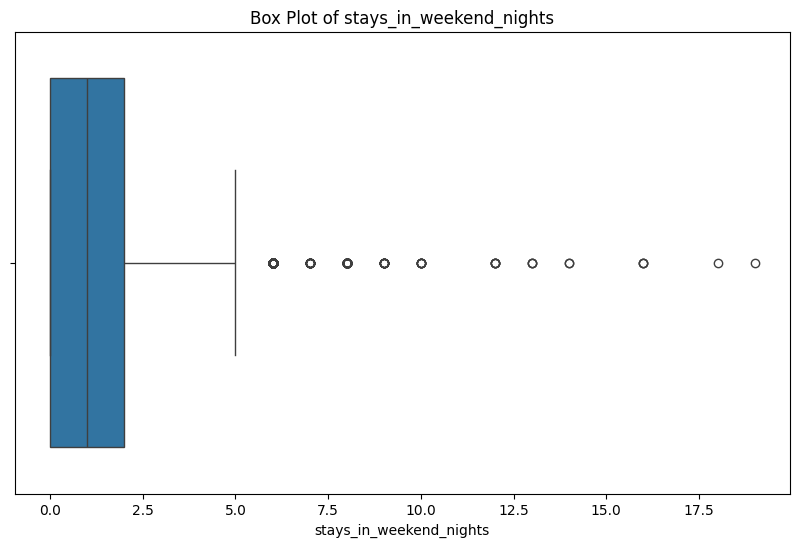

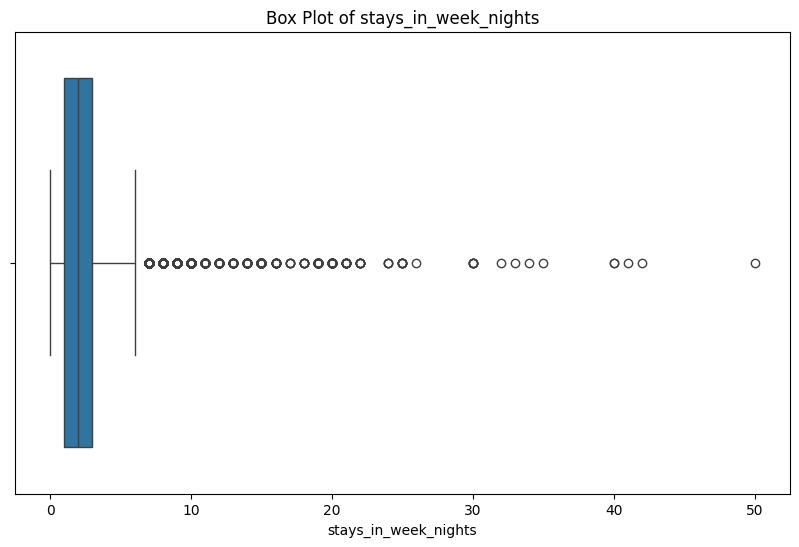

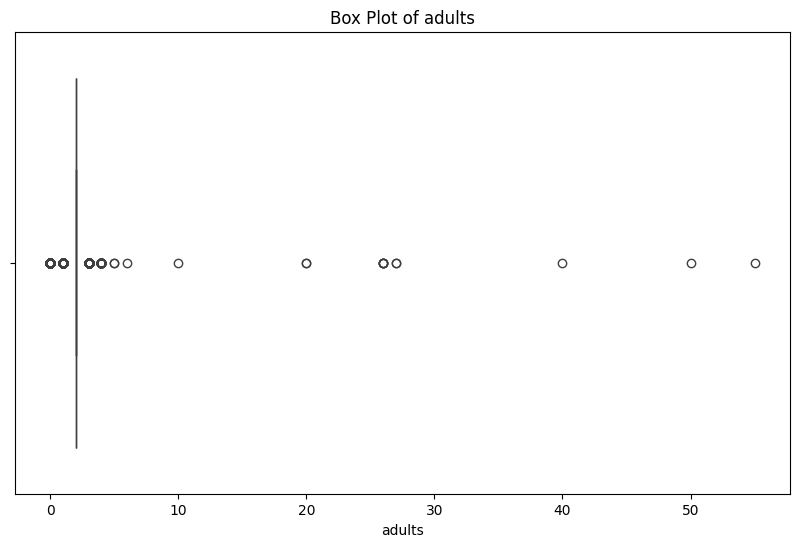

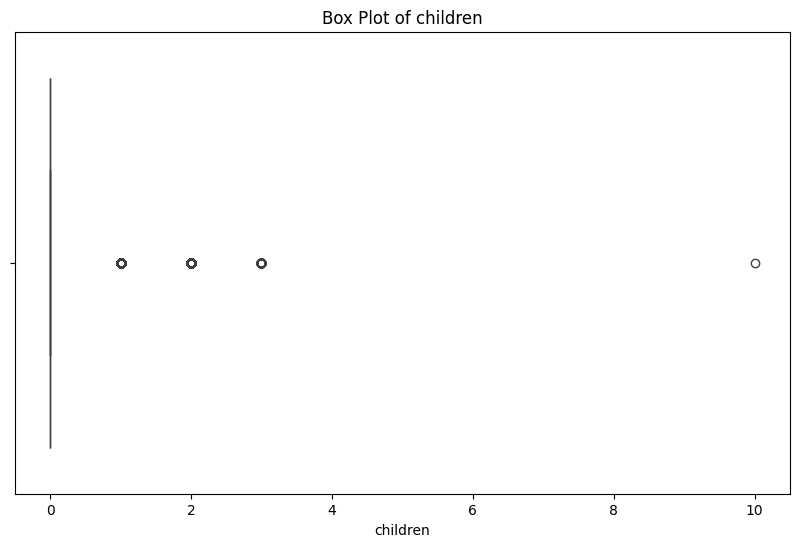

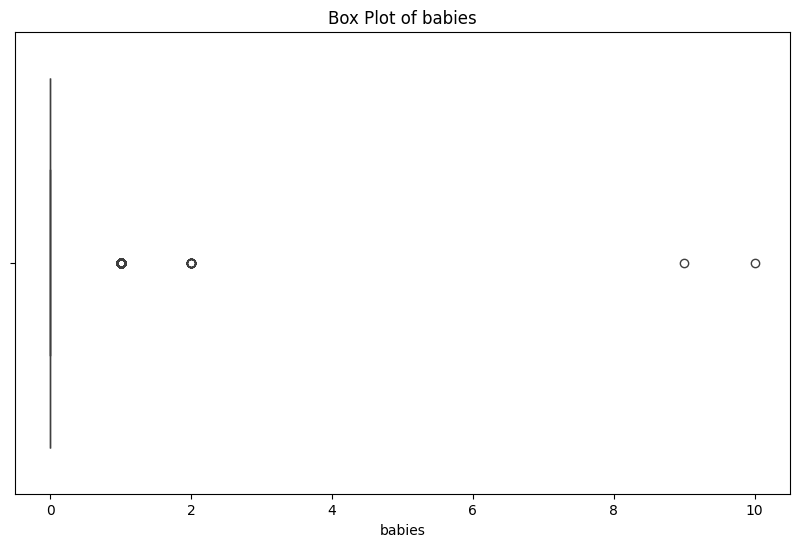

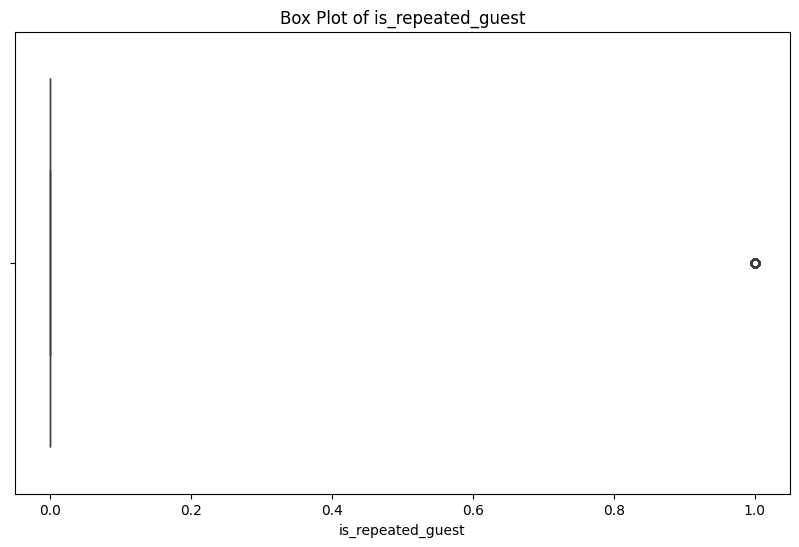

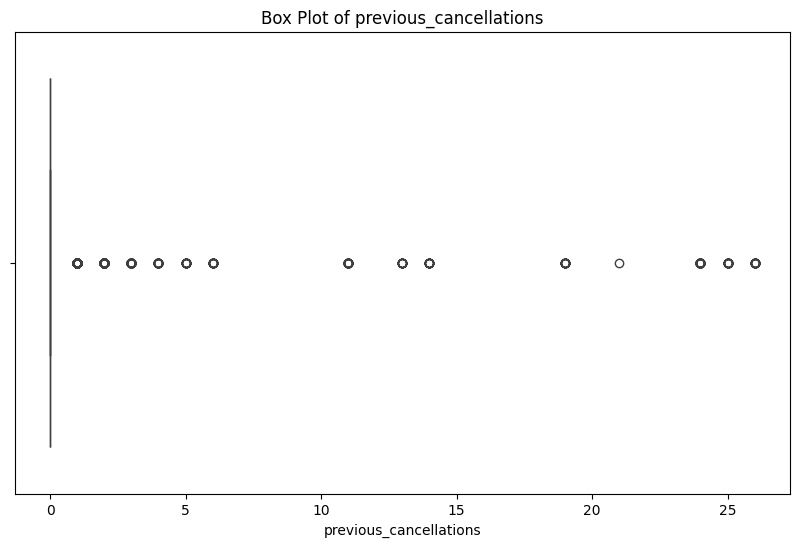

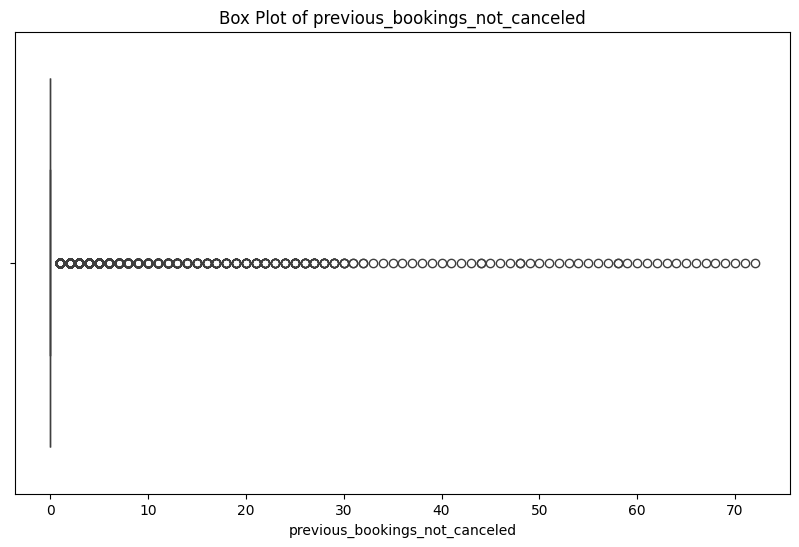

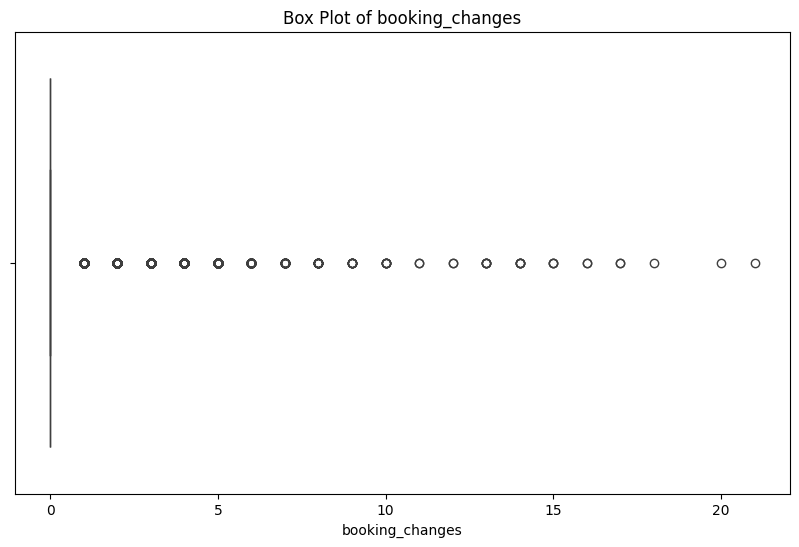

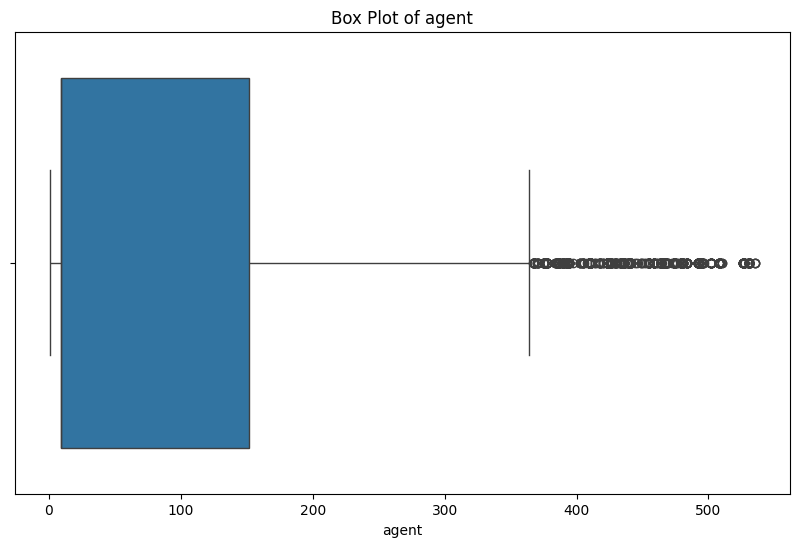

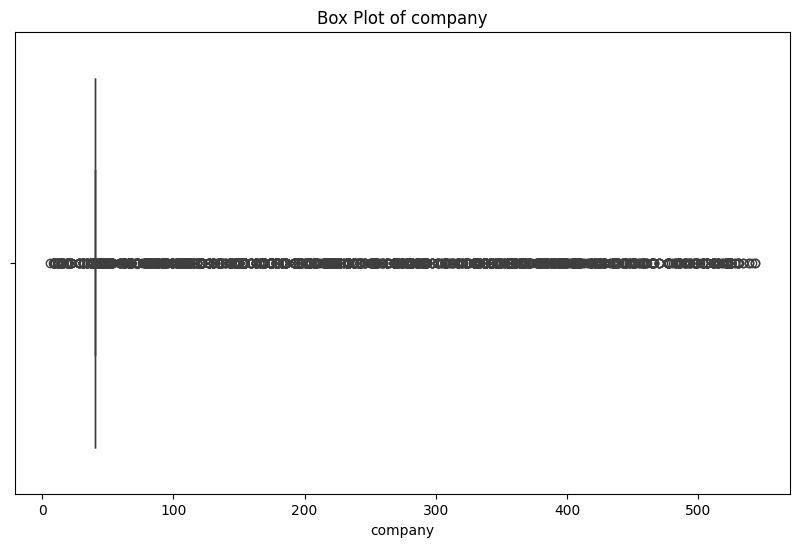

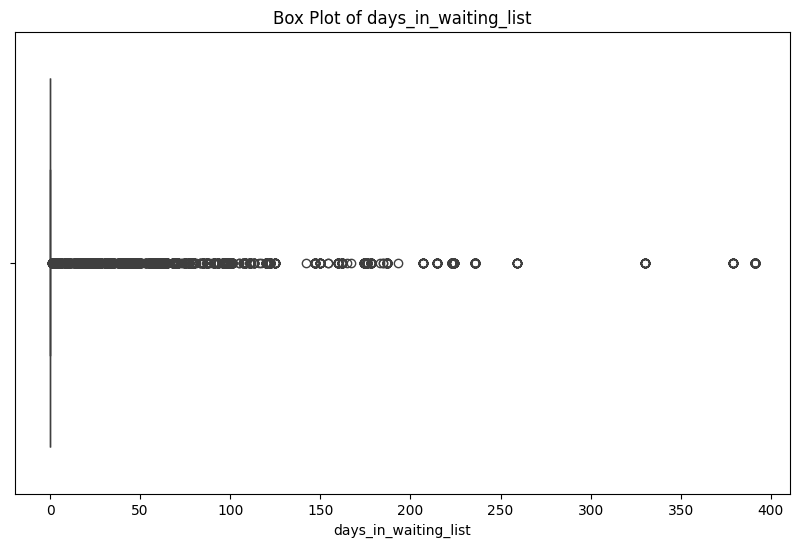

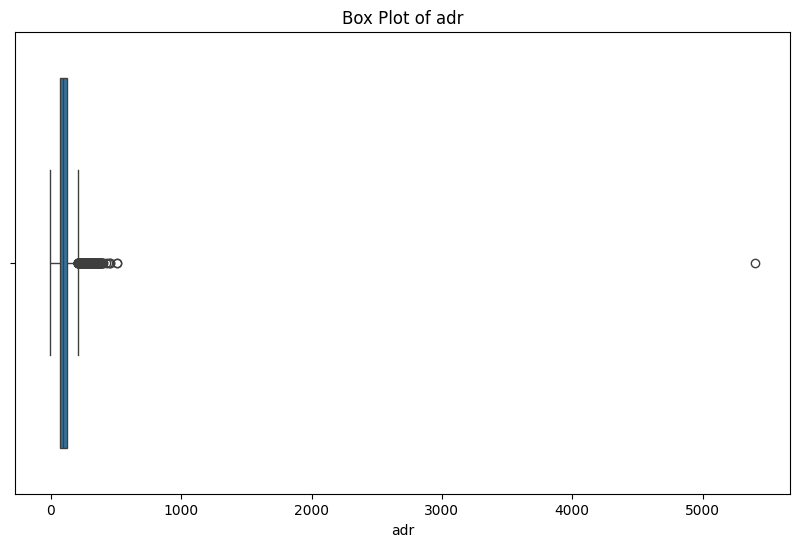

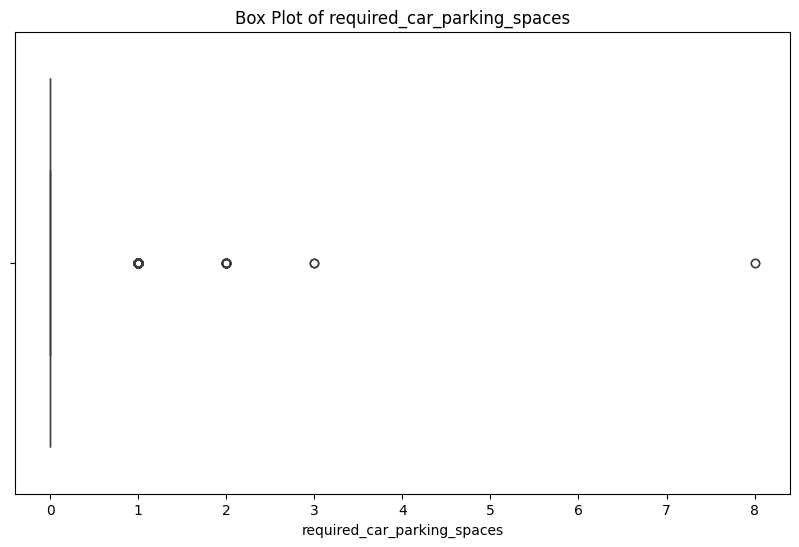

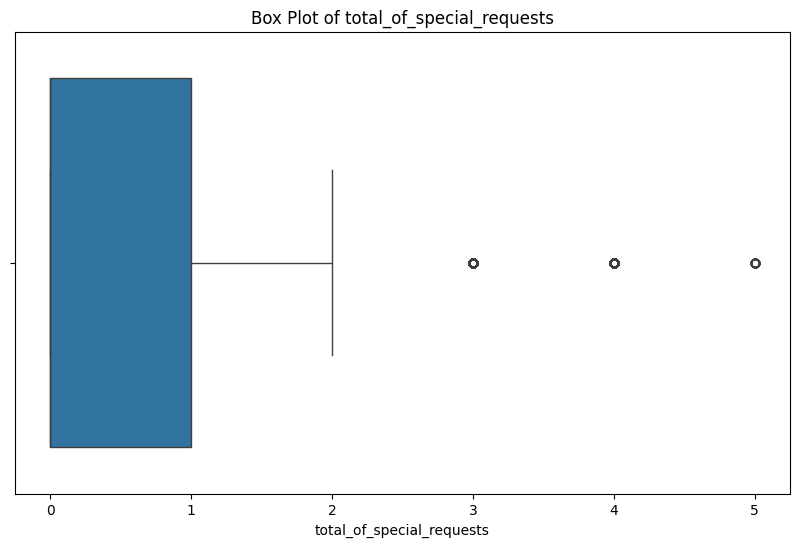

In [27]:
# Select only the numeric columns
numeric_columns = hotel_data.select_dtypes(include=['number'])

# Box Plots for numerical variables
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=hotel_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Statistical Tests

In [33]:
# SHAPIRO-WILK TEST
from scipy.stats import shapiro

# Perform shapiro-wilk test for normality on lead_time
stat, p = shapiro(hotel_data['lead_time'])
print(f'Shapiro-wilk Test for Lead Time: Statistics={stat}, p-value={p}')

Shapiro-wilk Test for Lead Time: Statistics=0.8567870237471207, p-value=2.1307491394675912e-126


In [35]:
# ANOVA Test
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform ANOVA for ADR by hotel Type
annova_model = ols('adr ~ C(hotel)', data=hotel_data).fit()
annova_table = sm.stats.anova_lm(annova_model, type=2)
print("ANNOVA Table for ADR by Hotel Type:")
print(annova_table)

ANNOVA Table for ADR by Hotel Type:
                df        sum_sq       mean_sq            F         PR(>F)
C(hotel)       1.0  2.852266e+06  2.852266e+06  1127.379303  5.234634e-246
Residual  119388.0  3.020513e+08  2.529997e+03          NaN            NaN


In [37]:
# Tukey's Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's Test for ADR by hotel Type
tukey = pairwise_tukeyhsd(hotel_data['adr'],hotel_data['hotel'])
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj  lower    upper  reject
--------------------------------------------------------------
City Hotel Resort Hotel -10.3515   0.0 -10.9558 -9.7473   True
--------------------------------------------------------------


In [38]:
# Chi-Squared Test
from scipy.stats import chi2_contingency

# Perform Chi-Squared test for hotel snd is_canceled
contingency_table = pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'chi-Squared Test for hotel and is_canceled: chi2={chi2}, p-value={p}')

chi-Squared Test for hotel and is_canceled: chi2=2224.924903923313, p-value=0.0


In [40]:
# T-Test
from scipy.stats import ttest_ind

# Perform t-test for ADR by Hotel Type
city_hotel_adr = hotel_data[hotel_data['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = hotel_data[hotel_data['hotel'] == 'Resort Hotel']['adr']
stat, p = ttest_ind(city_hotel_adr, resort_hotel_adr)
print(f'T-test for ADR by Hotel Type: Statistics={stat}, p-value={p}')

T-test for ADR by Hotel Type: Statistics=33.57646947661598, p-value=5.234634148763048e-246


# Seasonality Analysis

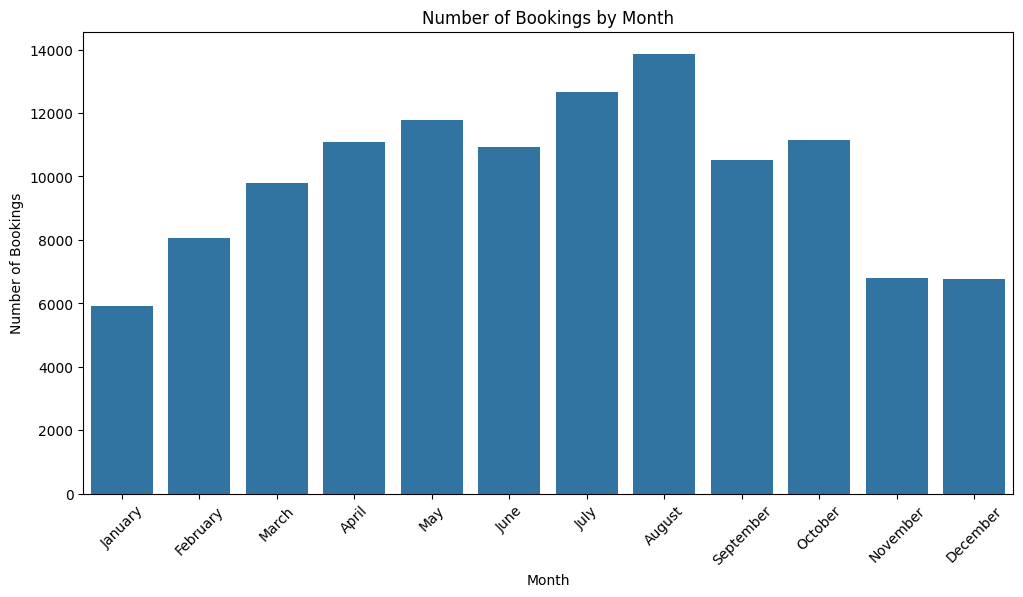

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert the 'arrival_date_month' column to a categorical type with the specified order
hotel_data['arrival_date_month'] = pd.Categorical(
    hotel_data['arrival_date_month'], 
    categories=month_order, 
    ordered=True
)

# Plot bookings by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=hotel_data, order=month_order)
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

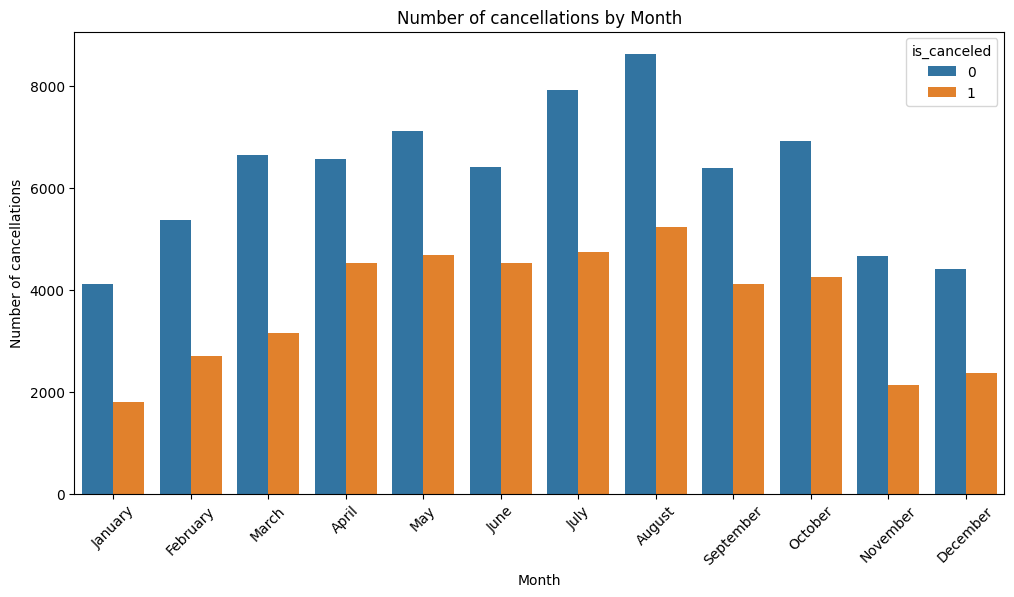

In [49]:
# Plot cancellations by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel_data, order=hotel_data['arrival_date_month'].cat.categories)
plt.title('Number of cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of cancellations')
plt.xticks(rotation=45)
plt.show()

# Descriptive Analytics using Visulizations

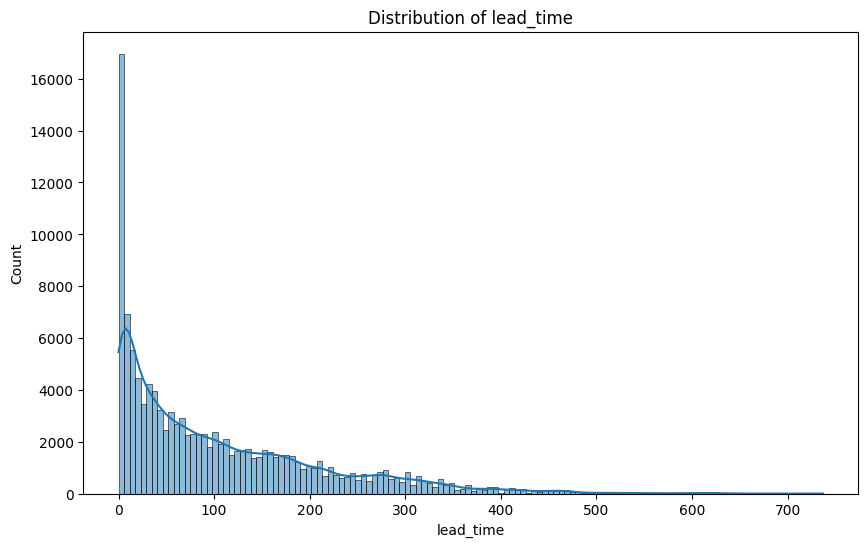

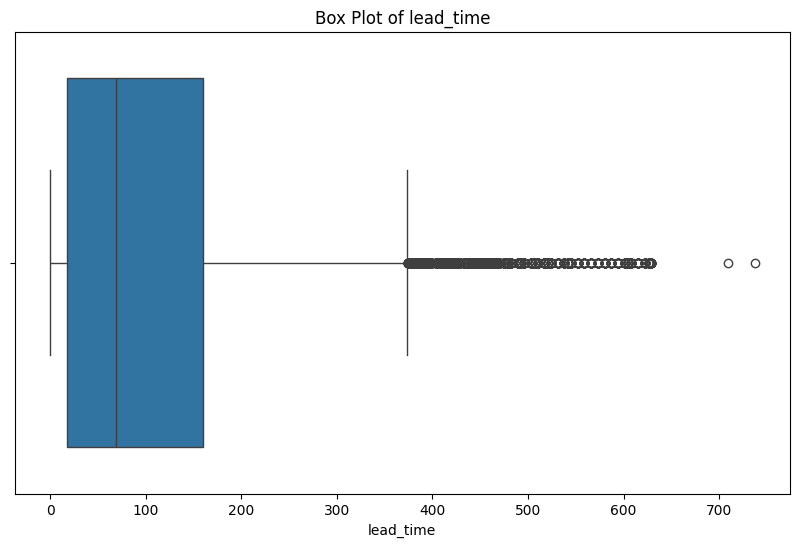

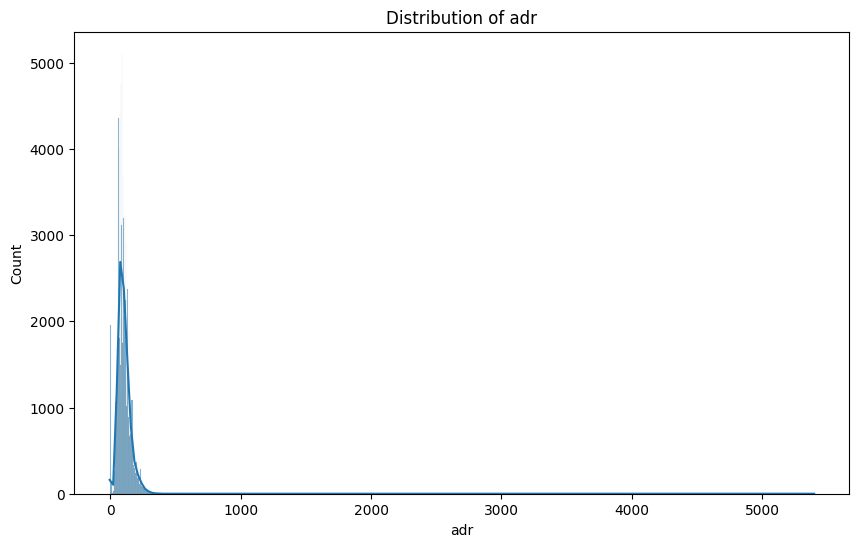

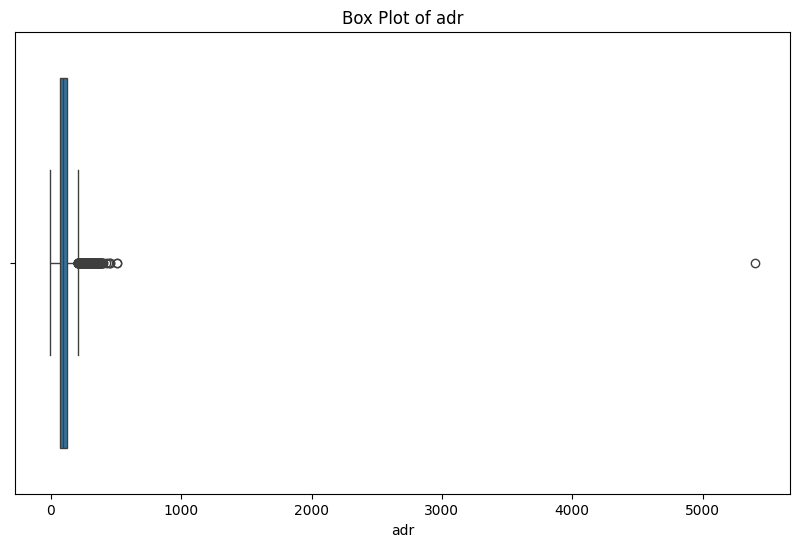

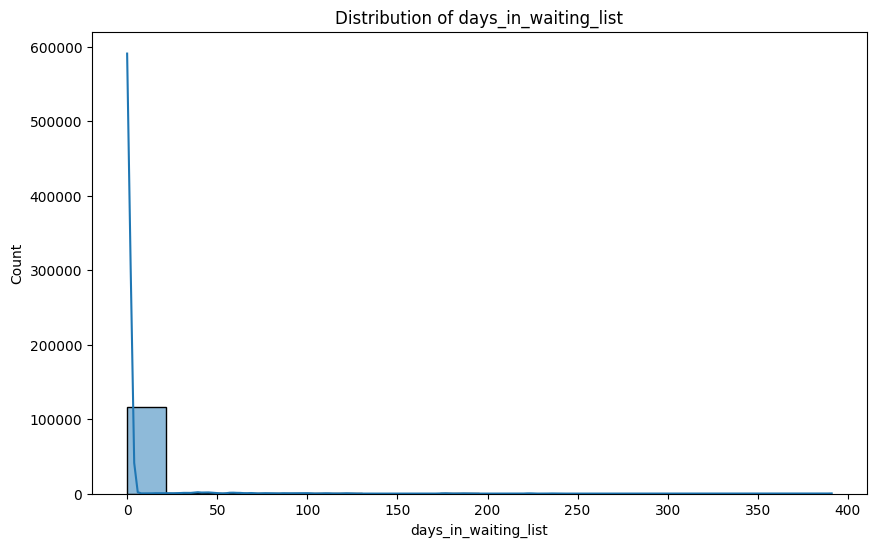

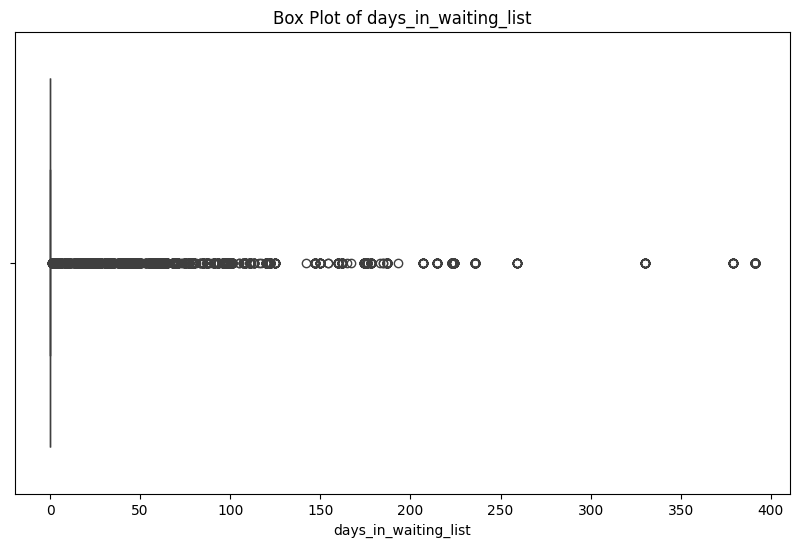

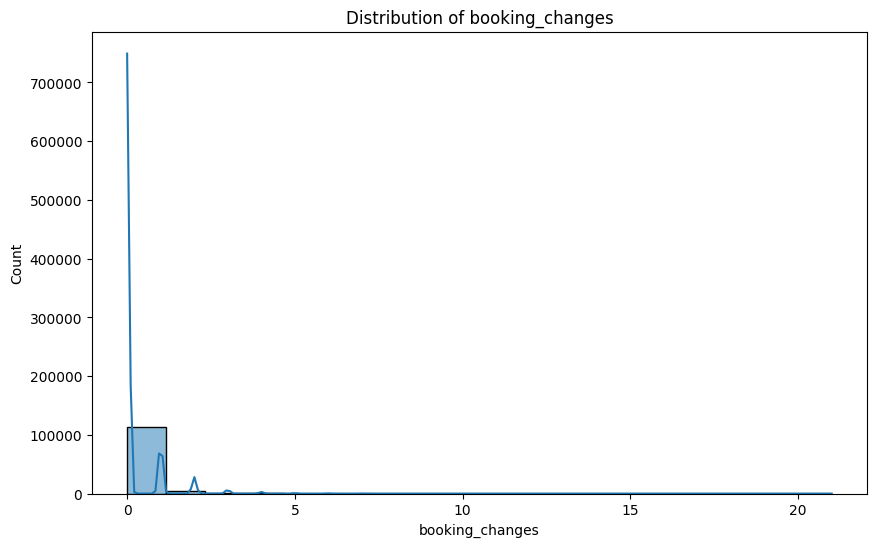

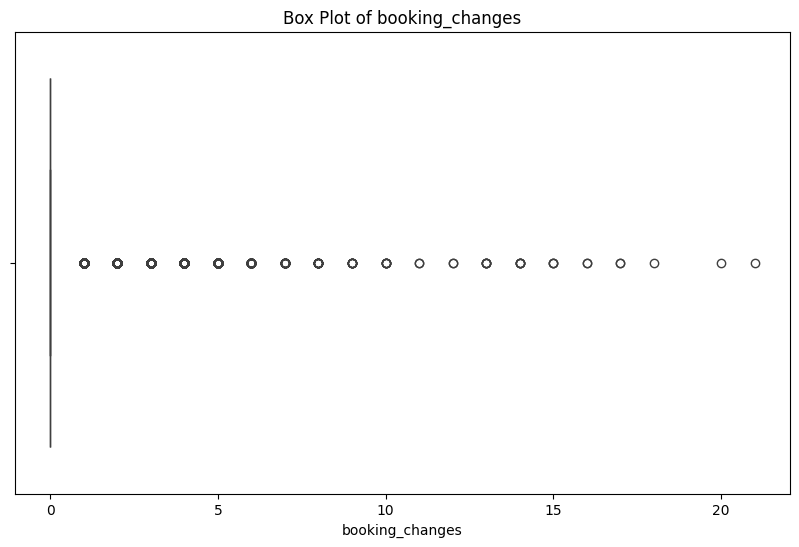

In [55]:
# Descriptive analytics using histograms and box plots for key numerical variables
numerical_columns = ['lead_time', 'adr', 'days_in_waiting_list', 'booking_changes']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot (hotel_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=hotel_data[column]) 
    plt.title(f'Box Plot of {column}')
    plt.show()

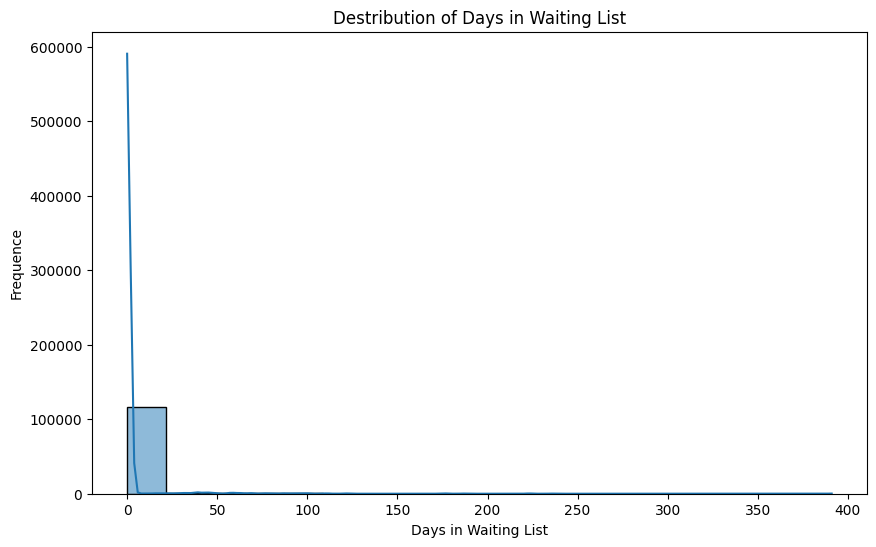

In [56]:
# Days in waiting list Distribution
plt.figure(figsize=(10, 6))
sns.histplot (hotel_data['days_in_waiting_list'], kde=True)
plt.title('Destribution of Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequence')
plt.show()

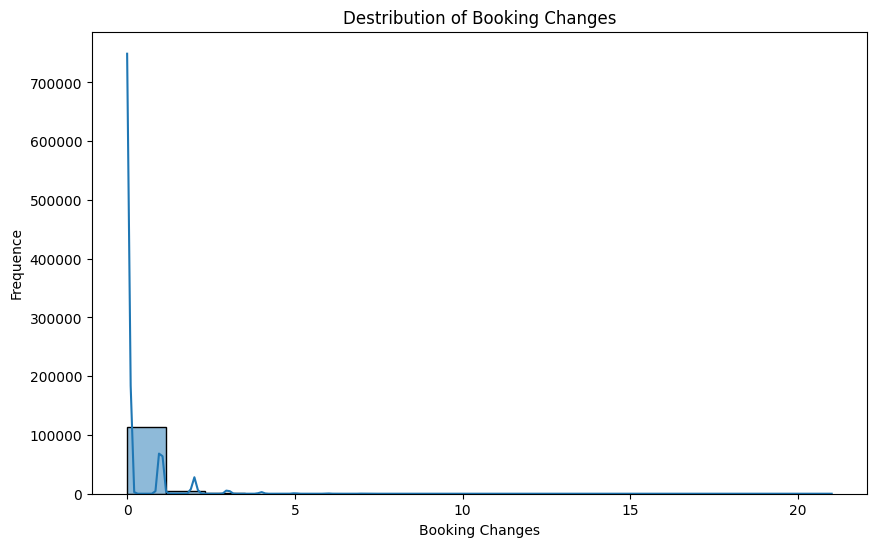

In [57]:
# Booking Changes Distribution
plt.figure(figsize=(10, 6))
sns.histplot (hotel_data['booking_changes'], kde=True)
plt.title('Destribution of Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Frequence')
plt.show()

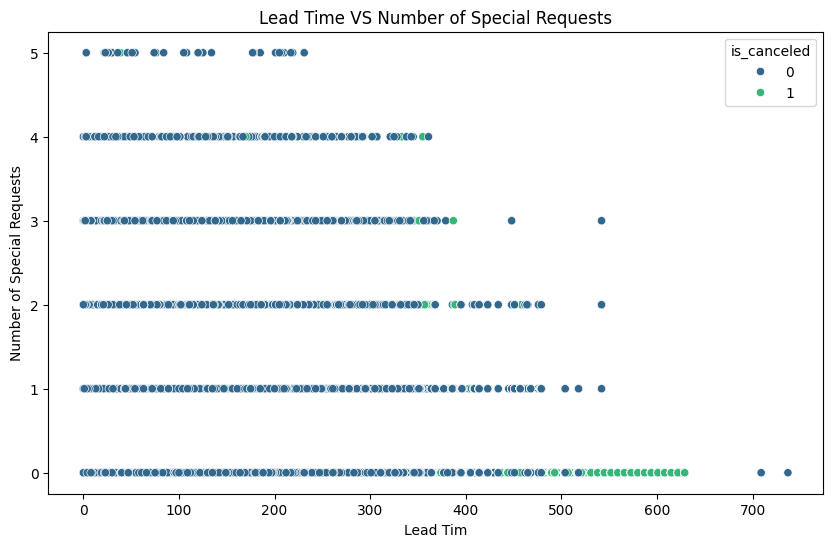

In [59]:
# Scatter plot of Lead Time VS Number of Special Requests
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hotel_data, x='lead_time', y='total_of_special_requests', hue='is_canceled', palette='viridis')
plt.title('Lead Time VS Number of Special Requests')
plt.xlabel('Lead Tim')
plt.ylabel('Number of Special Requests')
plt.show()

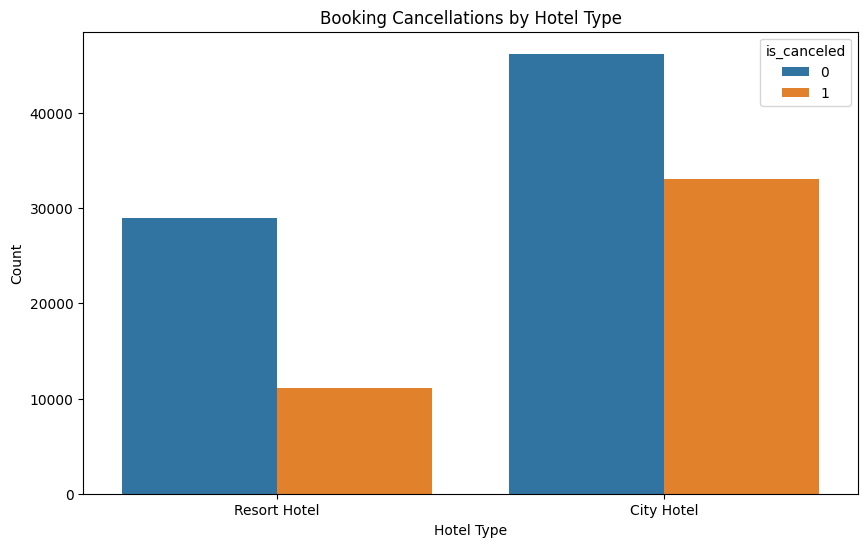

In [61]:
# Count plot of cancellations by Hotel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', hue='is_canceled', data=hotel_data)
plt.title('Booking Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()